<a href="https://colab.research.google.com/github/andsonandreribeiro09/Oficina_Regressao_Linear/blob/main/Modelo_Entidade_Relacionamento_(ER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üõçÔ∏è Voltado para Neg√≥cios:

##Quando o Cliente Vai Comprar? Estimando o Tempo de Aquisi√ß√£o com Pre√ßo Corrigido pela Infla√ß√£o

‚úÖ Objetivo Geral Requerido

Desenvolver um modelo de an√°lise baseado em regress√£o linear, partindo de um modelo Entidade-Relacionamento (ER) constru√≠do a partir do dom√≠nio do problema.

üí° Sua ideia do projeto

Prever o tempo necess√°rio para que um cliente possa adquirir um produto X, considerando que ele tem um a um valor fixo (ex: R$50). Os dados dispon√≠veis incluem cliente, pre√ßos dos produtos e compras realizadas.

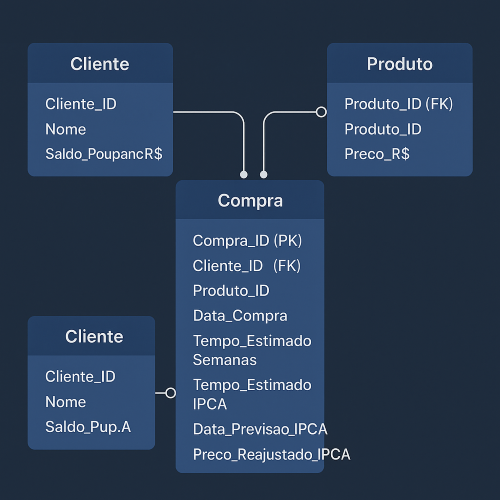

# Diagrama Entidade-Relacionamento (ER)

## Entidades e Atributos

### Cliente
- **Cliente_ID** (PK)
- Nome
- Saldo_Poupanca_R$

### Produto
- **Produto_ID** (PK)
- Nome_Produto
- Preco_R$

### Compra
- **Compra_ID** (PK)
- Cliente_ID (FK) ‚Üí Cliente
- Produto_ID (FK) ‚Üí Produto
- Data_Compra
- Tempo_Estimado_Semanas
- Tempo_Estimado_IPCA
- Data_Previsao_IPCA
- Preco_Reajustado_IPCA

---

## Relacionamentos

- **Cliente 1 ‚Äî‚Äî< Compra**
  - Um cliente pode realizar v√°rias compras (1:N)
- **Produto 1 ‚Äî‚Äî< Compra**
  - Um produto pode estar em v√°rias compras (1:N)
- **Compra >‚Äî‚Äî 1 Cliente**
- **Compra >‚Äî‚Äî 1 Produto**

---

## Visual Simplificado (Texto)

Rela√ß√µes:
Cliente 1 ‚Äî‚Äî< Compra >‚Äî‚Äî 1 Produto

O projeto seguiu as etapas do CRISP-DM:

iniciou-se com a compreens√£o do neg√≥cio, focando na previs√£o do tempo necess√°rio para um cliente adquirir um produto com base no saldo da poupan√ßa; em seguida, passou pela compreens√£o dos dados e prepara√ß√£o dos dados, com a organiza√ß√£o das entidades Cliente, Produto e Compra. A modelagem foi realizada com regress√£o linear, seguida por avalia√ß√£o com an√°lise visual e compara√ß√£o de previs√µes.

Por fim, na etapa de implanta√ß√£o, foram adicionadas previs√µes realistas considerando a infla√ß√£o via API do Banco Central, permitindo a simula√ß√£o de cen√°rios futuros com pre√ßos reajustados.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px
from datetime import datetime
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
produto = pd.read_csv('produto.csv')
cliente = pd.read_csv('cliente.csv')
compra = pd.read_csv('compra.csv')

In [3]:
produto

Produto_ID     Nome_Produto  Preco_R$
0           1     Smartphone X      1200
1           2       Notebook Y      3000
2           3  Fones Bluetooth       250
3           4      Bicicleta Z      1500
4           5         TV Smart      2800
5           6     Console Game      2500
6           7   C√¢mera Digital      1800
7           8           Tablet      1100
8           9       Impressora       650
9          10    Rel√≥gio Smart       450

In [4]:
# Lista de saldos correspondentes a cada cliente
saldos = [150, 80, 120, 50, 200]

# Adicionando a coluna saldo
cliente['Saldo_Poupanca_R$'] = saldos

print(cliente)

   Cliente_ID           Nome  Saldo_Poupanca_R$
0           1      Ana Souza                150
1           2    Bruno Costa                 80
2           3     Carla Lima                120
3           4  Diego Martins                 50
4           5    Elisa Rocha                200


In [5]:
cliente

Cliente_ID           Nome  Saldo_Poupanca_R$
0           1      Ana Souza                150
1           2    Bruno Costa                 80
2           3     Carla Lima                120
3           4  Diego Martins                 50
4           5    Elisa Rocha                200

In [6]:
compra

Compra_ID  Cliente_ID  Produto_ID Data_Compra
0          1           1           1  2025-03-12
1          2           2           3  2025-03-15
2          3           3           6  2025-04-10
3          4           4           4  2025-04-20
4          5           5           2  2025-05-05
5          6           1           7  2025-05-12
6          7           2           5  2025-05-15
7          8           3           9  2025-05-18
8          9           4          10  2025-05-25
9         10           5           8  2025-06-01

In [7]:
compra['Data_Compra'] = pd.to_datetime(compra['Data_Compra'])

In [8]:
# Merge compra + produto + cliente
compra_produto_cliente = compra.merge(produto, on='Produto_ID').merge(cliente, on='Cliente_ID')

In [9]:
# Calcular Tempo_Estimado_Semanas considerando saldo na poupan√ßa
compra_produto_cliente['Tempo_Estimado_Semanas'] = (
    (compra_produto_cliente['Preco_R$'] - compra_produto_cliente['Saldo_Poupanca_R$']) / 50
).clip(lower=0)  # Garante que n√£o haja tempo negativo

In [10]:
compra_produto_cliente

Compra_ID  Cliente_ID  Produto_ID Data_Compra     Nome_Produto  Preco_R$  \
0          1           1           1  2025-03-12     Smartphone X      1200   
1          2           2           3  2025-03-15  Fones Bluetooth       250   
2          3           3           6  2025-04-10     Console Game      2500   
3          4           4           4  2025-04-20      Bicicleta Z      1500   
4          5           5           2  2025-05-05       Notebook Y      3000   
5          6           1           7  2025-05-12   C√¢mera Digital      1800   
6          7           2           5  2025-05-15         TV Smart      2800   
7          8           3           9  2025-05-18       Impressora       650   
8          9           4          10  2025-05-25    Rel√≥gio Smart       450   
9         10           5           8  2025-06-01           Tablet      1100   

            Nome  Saldo_Poupanca_R$  Tempo_Estimado_Semanas  
0      Ana Souza                150                    21.0  
1    Bruno Costa                 80                     3.4  
2     Carla Lima                120                    47.6  
3  Diego Martins                 50                    29.0  
4    Elisa Rocha                200                    56.0  
5      Ana Souza                150                    33.0  
6    Bruno Costa                 80                    54.4  
7     Carla Lima                120                    10.6  
8  Diego Martins                 50                     8.0  
9    Elisa Rocha                200                    18.0

In [11]:
compra_produto_cliente.describe()

Compra_ID  Cliente_ID  Produto_ID          Data_Compra     Preco_R$  \
count   10.00000   10.000000    10.00000                   10    10.000000   
mean     5.50000    3.000000     5.50000  2025-04-28 04:48:00  1525.000000   
min      1.00000    1.000000     1.00000  2025-03-12 00:00:00   250.000000   
25%      3.25000    2.000000     3.25000  2025-04-12 12:00:00   762.500000   
50%      5.50000    3.000000     5.50000  2025-05-08 12:00:00  1350.000000   
75%      7.75000    4.000000     7.75000  2025-05-17 06:00:00  2325.000000   
max     10.00000    5.000000    10.00000  2025-06-01 00:00:00  3000.000000   
std      3.02765    1.490712     3.02765                  NaN   981.000057   

       Saldo_Poupanca_R$  Tempo_Estimado_Semanas  
count          10.000000               10.000000  
mean          120.000000               28.100000  
min            50.000000                3.400000  
25%            80.000000               12.450000  
50%           120.000000               25.000000  
75%           150.000000               43.950000  
max           200.000000               56.000000  
std            55.377492               19.287129

In [12]:
compra_produto_cliente.isnull().sum()

Compra_ID                 0
Cliente_ID                0
Produto_ID                0
Data_Compra               0
Nome_Produto              0
Preco_R$                  0
Nome                      0
Saldo_Poupanca_R$         0
Tempo_Estimado_Semanas    0
dtype: int64

In [13]:
# Definindo as vari√°veis
X = compra_produto_cliente[['Preco_R$', 'Saldo_Poupanca_R$']].values
y = compra_produto_cliente['Tempo_Estimado_Semanas'].values

In [14]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [15]:
# Mostrando os coeficientes
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

Coeficientes: [ 0.02 -0.02]
Intercepto: 0.0


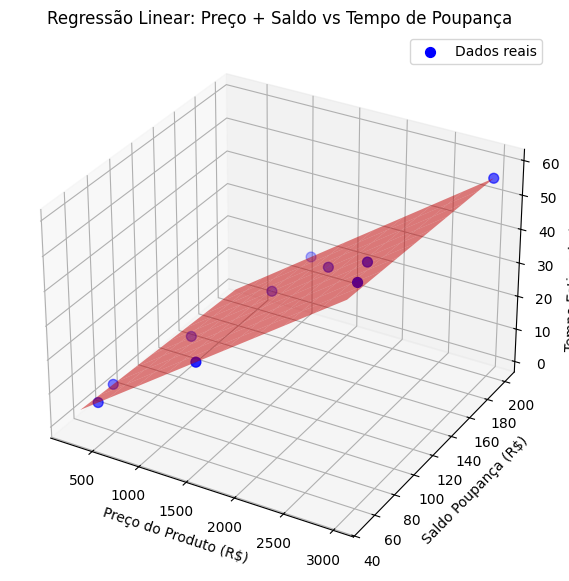

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(
    compra_produto_cliente['Preco_R$'],
    compra_produto_cliente['Saldo_Poupanca_R$'],
    compra_produto_cliente['Tempo_Estimado_Semanas'],
    color='blue', s=50, label='Dados reais'
)

# Superf√≠cie de regress√£o
preco_range = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 10)
saldo_range = np.linspace(compra_produto_cliente['Saldo_Poupanca_R$'].min(), compra_produto_cliente['Saldo_Poupanca_R$'].max(), 10)

preco_grid, saldo_grid = np.meshgrid(preco_range, saldo_range)
tempo_predito = modelo.predict(np.c_[preco_grid.ravel(), saldo_grid.ravel()]).reshape(preco_grid.shape)

ax.plot_surface(preco_grid, saldo_grid, tempo_predito, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Pre√ßo do Produto (R$)')
ax.set_ylabel('Saldo Poupan√ßa (R$)')
ax.set_zlabel('Tempo Estimado (semanas)')
ax.set_title('Regress√£o Linear: Pre√ßo + Saldo vs Tempo de Poupan√ßa')
ax.legend()
plt.show()


## üìä O que o gr√°fico est√° mostrando?

Este gr√°fico 3D mostra a **rela√ß√£o entre tr√™s vari√°veis**:
- **Pre√ßo do Produto (R$)** ‚Äî eixo X
- **Saldo Poupan√ßa semanal (R$)** ‚Äî eixo Y
- **Tempo Estimado (semanas)** para compra ‚Äî eixo Z

---

### üîµ Pontos Azuis:
- Representam os **dados reais** de tempo necess√°rio para comprar cada produto, dado o pre√ßo e o saldo na poupan√ßa.

### üü• Plano vermelho:
- Representa a **regress√£o linear m√∫ltipla** que estima o tempo com base nas duas vari√°veis explicativas:
  - Pre√ßo do produto
  - Saldo da poupan√ßa

---

### üí° O que podemos observar:

- O plano se ajusta bem aos pontos, indicando que o modelo de regress√£o explica bem os dados.
- A inclina√ß√£o do plano mostra que:
  - Quanto **maior o pre√ßo**, **maior o tempo estimado**.
  - Quanto **maior o saldo na poupan√ßa**, **menor o tempo necess√°rio**.

---

### ‚úÖ Conclus√£o:

- O tempo estimado para comprar um produto depende **simultaneamente** do pre√ßo e do quanto se consegue guardar por semana.
- O modelo 3D de regress√£o permite **prever com mais precis√£o** o tempo necess√°rio ao considerar esses dois fatores ao mesmo tempo.
- Esse tipo de an√°lise √© excelente para **simula√ß√µes financeiras** personalizadas e planejamento de metas.


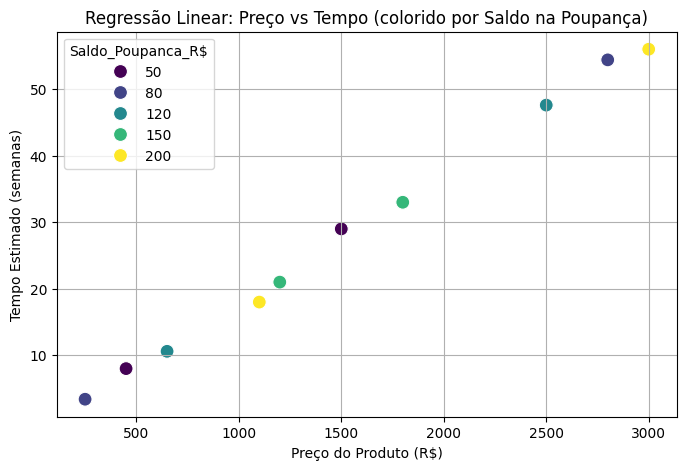

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Preco_R$',
    y='Tempo_Estimado_Semanas',
    hue='Saldo_Poupanca_R$',
    palette='viridis',
    data=compra_produto_cliente,
    s=100
)
plt.xlabel('Pre√ßo do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regress√£o Linear: Pre√ßo vs Tempo (colorido por Saldo na Poupan√ßa)')
plt.grid(True)
plt.show()

## üìä O que o gr√°fico est√° mostrando?

- Existe uma **rela√ß√£o linear positiva**: quanto **maior o pre√ßo do produto**, **maior o tempo necess√°rio** para alcan√ß√°-lo (faz sentido, n√©?).

- **Pessoas com maior saldo na poupan√ßa** (_representadas por cores mais claras_) conseguem atingir os produtos **em menos semanas**, mesmo os mais caros.

### üí° Exemplo:
Um produto de **R$1.200** pode ser alcan√ßado em:
- **~21 semanas** por algu√©m que guarda **R$60** por semana.
- **~18 semanas** por quem guarda **R$120** por semana.

- J√° **pessoas com menor saldo na poupan√ßa** (_cores mais escuras_) **demoram muito mais** para atingir o mesmo objetivo.


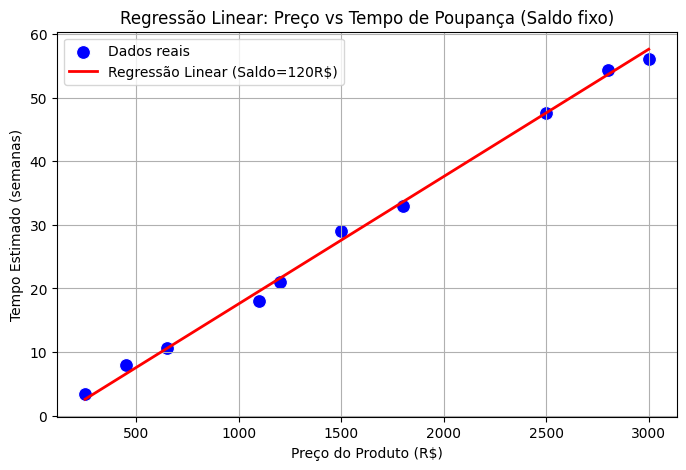

In [ ]:
saldo_fixo = compra_produto_cliente['Saldo_Poupanca_R$'].mean()

# Gera√ß√£o da linha de regress√£o
X_pred = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 100)
X_input = np.c_[X_pred, np.full_like(X_pred, saldo_fixo)]
y_pred = modelo.predict(X_input)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Preco_R$', y='Tempo_Estimado_Semanas', data=compra_produto_cliente, s=100, color='blue', label='Dados reais')
plt.plot(X_pred, y_pred, color='red', linewidth=2, label=f'Regress√£o Linear (Saldo={saldo_fixo:.0f}R$)')
plt.xlabel('Pre√ßo do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regress√£o Linear: Pre√ßo vs Tempo de Poupan√ßa (Saldo fixo)')
plt.legend()
plt.grid(True)
plt.show()

## üìä O que o gr√°fico est√° mostrando?

Este gr√°fico mostra a **rela√ß√£o entre o pre√ßo de um produto (R$)** e o **tempo necess√°rio para compr√°-lo (em semanas)**, assumindo que o consumidor **guarda R$120 por semana**.

---

### üîµ Pontos Azuis:  
- Representam os **dados reais** de tempo estimado para diferentes pre√ßos de produtos.

### üî¥ Linha Vermelha:  
- Representa a **regress√£o linear** para um saldo fixo de **R$120/semana**.
- Essa linha indica a **tend√™ncia geral**: o tempo aumenta proporcionalmente com o pre√ßo do produto.

---

### üí° O que podemos observar:

- Existe uma **forte rela√ß√£o linear** entre o pre√ßo e o tempo: quanto maior o pre√ßo, mais tempo √© necess√°rio.
- A **reta vermelha se ajusta muito bem aos pontos**, o que indica que o modelo de regress√£o linear funciona bem nesse caso.
- Como o saldo da poupan√ßa √© fixo (R$120), a inclina√ß√£o da reta √© constante.

---

### ‚úÖ Conclus√£o:

- Para cada R$120 de pre√ßo adicional do produto, ser√° necess√°rio **+1 semana** de poupan√ßa.
- Esse tipo de gr√°fico √© √∫til para **prever rapidamente o tempo necess√°rio** para adquirir um produto com base em um valor fixo de economia semanal.


In [16]:
def obter_inflacao_ipca(data_inicial, data_final):
    hoje = pd.Timestamp.today()
    if data_inicial > hoje or data_final > hoje:
        # Datas futuras: usar infla√ß√£o projetada anual (exemplo 5%)
        dias = (data_final - data_inicial).days
        inflacao_anual = 0.05
        inflacao_projetada = (1 + inflacao_anual) ** (dias / 365) - 1
        return inflacao_projetada

    # Caso contr√°rio, consulta API normalmente
    data_inicial_str = data_inicial.strftime('%d/%m/%Y')
    data_final_str = data_final.strftime('%d/%m/%Y')

    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json&dataInicial={data_inicial_str}&dataFinal={data_final_str}'

    resposta = requests.get(url)
    if resposta.status_code != 200:
        print(f"‚ö†Ô∏è Aviso: erro na consulta da infla√ß√£o: Erro ao consultar API do BCB: {resposta.status_code}")
        return 0.0

    dados = resposta.json()
    if not dados:
        return 0.0

    df_ipca = pd.DataFrame(dados)
    df_ipca['data'] = pd.to_datetime(df_ipca['data'], dayfirst=True)
    df_ipca['valor'] = pd.to_numeric(df_ipca['valor'])

    fatores = 1 + (df_ipca['valor'] / 100)
    inflacao_acumulada = fatores.prod() - 1

    return inflacao_acumulada

In [17]:
def prever_tempo_data_reajuste_ipca(row, modelo, iteracoes=3):
    preco = row['Preco_R$']
    saldo = row['Saldo_Poupanca_R$']
    data_compra = row['Data_Compra']

    preco_ajustado = preco

    for _ in range(iteracoes):
        tempo_estimado = modelo.predict([[preco_ajustado, saldo]])[0]
        tempo_estimado = max(0, tempo_estimado)

        data_previsao = data_compra + pd.to_timedelta(tempo_estimado * 7, unit='D')

        try:
            inflacao = obter_inflacao_ipca(data_compra, data_previsao)
        except Exception as e:
            print(f"Aviso: erro na consulta da infla√ß√£o: {e}")
            inflacao = 0

        preco_ajustado = preco * (1 + inflacao)

    return pd.Series([tempo_estimado, data_previsao, preco_ajustado])


In [18]:
compra_produto_cliente[['Tempo_Estimado_IPCA', 'Data_Previsao_IPCA', 'Preco_Reajustado_IPCA']] = \
    compra_produto_cliente.apply(prever_tempo_data_reajuste_ipca, axis=1, modelo=modelo)

print(compra_produto_cliente[['Nome', 'Nome_Produto', 'Preco_R$', 'Data_Compra',
                             'Data_Previsao_IPCA', 'Preco_Reajustado_IPCA', 'Tempo_Estimado_IPCA']])


            Nome     Nome_Produto  Preco_R$ Data_Compra  \
0      Ana Souza     Smartphone X      1200  2025-03-12   
1    Bruno Costa  Fones Bluetooth       250  2025-03-15   
2     Carla Lima     Console Game      2500  2025-04-10   
3  Diego Martins      Bicicleta Z      1500  2025-04-20   
4    Elisa Rocha       Notebook Y      3000  2025-05-05   
5      Ana Souza   C√¢mera Digital      1800  2025-05-12   
6    Bruno Costa         TV Smart      2800  2025-05-15   
7     Carla Lima       Impressora       650  2025-05-18   
8  Diego Martins    Rel√≥gio Smart       450  2025-05-25   
9    Elisa Rocha           Tablet      1100  2025-06-01   

             Data_Previsao_IPCA  Preco_Reajustado_IPCA  Tempo_Estimado_IPCA  
0 2025-08-09 09:39:38.072989393            1224.303743            21.486075  
1 2025-04-08 03:32:10.417920000             252.481020             3.449620  
2 2026-03-25 21:57:23.076581034            2619.391789            49.987836  
3 2025-11-14 22:05:49.040859638     

In [19]:
compra_produto_cliente

Compra_ID  Cliente_ID  Produto_ID Data_Compra     Nome_Produto  Preco_R$  \
0          1           1           1  2025-03-12     Smartphone X      1200   
1          2           2           3  2025-03-15  Fones Bluetooth       250   
2          3           3           6  2025-04-10     Console Game      2500   
3          4           4           4  2025-04-20      Bicicleta Z      1500   
4          5           5           2  2025-05-05       Notebook Y      3000   
5          6           1           7  2025-05-12   C√¢mera Digital      1800   
6          7           2           5  2025-05-15         TV Smart      2800   
7          8           3           9  2025-05-18       Impressora       650   
8          9           4          10  2025-05-25    Rel√≥gio Smart       450   
9         10           5           8  2025-06-01           Tablet      1100   

            Nome  Saldo_Poupanca_R$  Tempo_Estimado_Semanas  \
0      Ana Souza                150                    21.0   
1    Bruno Costa                 80                     3.4   
2     Carla Lima                120                    47.6   
3  Diego Martins                 50                    29.0   
4    Elisa Rocha                200                    56.0   
5      Ana Souza                150                    33.0   
6    Bruno Costa                 80                    54.4   
7     Carla Lima                120                    10.6   
8  Diego Martins                 50                     8.0   
9    Elisa Rocha                200                    18.0   

   Tempo_Estimado_IPCA            Data_Previsao_IPCA  Preco_Reajustado_IPCA  
0            21.486075 2025-08-09 09:39:38.072989393            1224.303743  
1             3.449620 2025-04-08 03:32:10.417920000             252.481020  
2            49.987836 2026-03-25 21:57:23.076581034            2619.391789  
3            29.845815 2025-11-14 22:05:49.040859638            1542.290761  
4            59.413999 2026-06-24 21:33:06.493787524            3171.123803  
5            34.163712 2026-01-06 03:30:12.963973749            1858.433999  
6            57.483638 2026-06-21 09:15:04.340686685            2954.576823  
7            10.730985 2025-08-01 02:48:19.959255622             656.549269  
8             8.067623 2025-07-20 11:21:38.579888453             453.381166  
9            18.379658 2025-10-07 15:46:57.259543339            1118.982908

In [25]:
# Simulador

# Gr√°fico de barras horizontais: Tempo estimado vs Produto
fig1 = px.bar(
    compra_produto_cliente,
    x="Tempo_Estimado_IPCA",
    y="Nome_Produto",
    color="Nome",
    orientation="h",
    title="‚è≥ Tempo Estimado para Comprar Produtos com IPCA"
)
fig1.show()

# Gr√°fico de dispers√£o: Pre√ßo reajustado vs Tempo
fig2 = px.scatter(
    compra_produto_cliente,
    x="Preco_Reajustado_IPCA",
    y="Tempo_Estimado_IPCA",
    color="Nome",
    size="Preco_Reajustado_IPCA",
    hover_data=["Nome_Produto", "Data_Compra"],
    title="üí∏ Pre√ßo Reajustado vs Tempo Estimado"
)
fig2.show()

# Linha do tempo: da data da compra at√© a previs√£o de aquisi√ß√£o
fig3 = px.timeline(
    compra_produto_cliente,
    x_start="Data_Compra",
    x_end="Data_Previsao_IPCA",
    y="Nome_Produto",
    color="Nome",
    title="üìÜ Linha do Tempo: Planejamento de Compras"
)
fig3.update_yaxes(autorange="reversed")
fig3.show()


üé¨ T√≠tulo do V√≠deo

"Quando o Cliente Pode Comprar? Previs√£o com Regress√£o Linear e Corre√ß√£o por Infla√ß√£o"

‚è±Ô∏è Dura√ß√£o: 3 minutos

üéôÔ∏è ROTEIRO NARRADO

üéß [0:00 ‚Äì 0:15] ‚Äî Introdu√ß√£o

"Neste v√≠deo, voc√™ vai conhecer um projeto de ci√™ncia de dados que responde a uma pergunta simples, mas muito valiosa para o varejo:

Quando um cliente conseguir√° comprar um produto?
Usamos aprendizado de m√°quina, dados reais e corre√ß√£o de pre√ßos pela infla√ß√£o para estimar esse tempo com precis√£o."

üîπ Anima√ß√£o:

surgem Cliente, Produto e Compra com linhas conectando-os (ER).

üéß [0:15 ‚Äì 0:45] ‚Äî Compreens√£o do neg√≥cio

"Come√ßamos aplicando a metodologia CRISP-DM.

A primeira etapa foi entender o problema: um cliente guarda dinheiro na poupan√ßa.

Ele deseja comprar um item ‚Äî mas em quantas semanas isso ser√° poss√≠vel?"

üîπ Anima√ß√£o:

Elisa com carrinho, olhando saldo na poupan√ßa e produto com pre√ßo.

üéß [0:45 ‚Äì 1:10] ‚Äî Coleta e Prepara√ß√£o dos Dados


"Coletamos dados de clientes, produtos e compras.
Organizamos isso num modelo Entidade-Relacionamento, com tr√™s tabelas principais: Cliente, Produto e Compra."

üîπ Anima√ß√£o: ER diagram aparece com chave prim√°ria e estrangeira.

üéß [1:10 ‚Äì 1:35] ‚Äî Modelagem


"Usamos regress√£o linear para prever o tempo estimado de compra com base no pre√ßo do produto e no saldo atual.
O modelo aprendeu que quanto maior o saldo ou menor o pre√ßo, menor o tempo."

üîπ Anima√ß√£o:

Gr√°fico de dispers√£o Pre√ßo x Tempo, pontos coloridos por saldo.

üéß [1:35 ‚Äì 2:00] ‚Äî Avalia√ß√£o com IPCA

"Mas na vida real, os pre√ßos mudam.
Ent√£o integramos uma API do Banco Central para obter o IPCA real, m√™s a m√™s, e corrigir o valor dos produtos no tempo."

üîπ Anima√ß√£o:

API ‚Üí gr√°fico com infla√ß√£o acumulada ‚Üí novo pre√ßo reajustado.

üéß [2:00 ‚Äì 2:30] ‚Äî Caso Elisa Rocha


Vamos ver um exemplo.

Elisa Rocha tem 200 reais guardados e guardara 50 reais por semana
Ela quer comprar um Tablet de 1.100 e um Notebook de
3.000.

O modelo estima que ela conseguir√° comprar o tablet em 18 semanas, com pre√ßo corrigido para R$ 1.118.98

J√° o notebook s√≥ poder√° ser comprado em 59 semanas, quando custar√°     R$ 3.171

üîπ Anima√ß√£o:

Linha do tempo com bal√µes de valor futuro e datas previstas.

üéß [2:30 ‚Äì 3:00] ‚Äî Conclus√£o


"Com esse modelo, √© poss√≠vel simular cen√°rios reais de compra ao longo do tempo,
ajudar empresas no planejamento de marketing e permitir ao cliente acompanhar suas metas financeiras.

Dados, aprendizado de m√°quina e infla√ß√£o real ‚Äî juntos, para prever o futuro."

üîπ Anima√ß√£o final:

gr√°fico subindo, carrinho de compras se movendo at√© a meta.

Todo materia se encontra no link

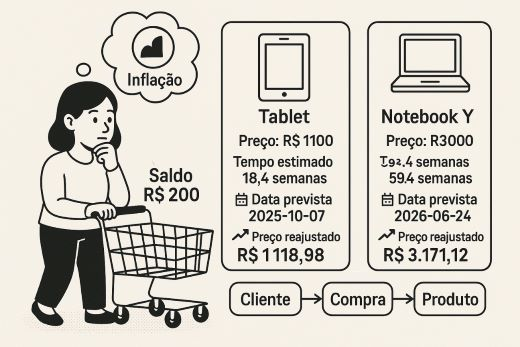


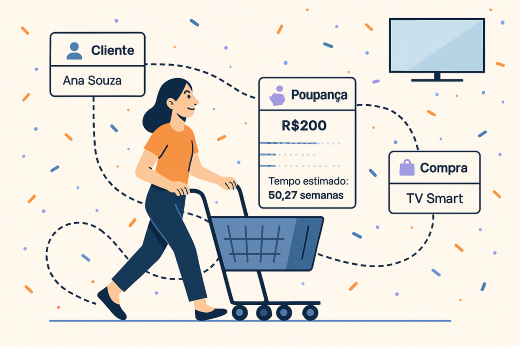

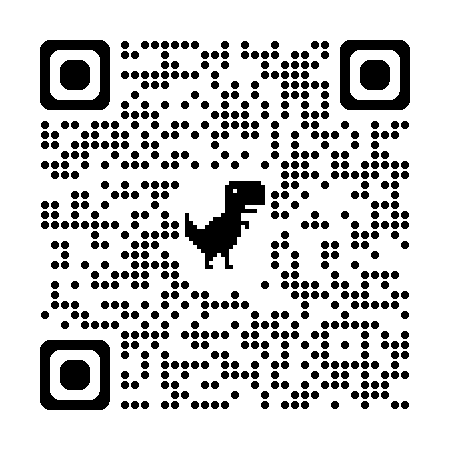


[![GitHub](https://img.shields.io/badge/GitHub-Projeto_Oficina_Linear-black?logo=github)](https://github.com/andsonandreribeiro09/Oficina_Regressao_Linear/blob/main/README.md)
